# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
states_edu = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
states_edu.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

states_edu["ENROLL_ALL_EST"] = states_edu["ENROLL_ALL_EST"].fillna(states_edu["ENROLL_ALL"])
print(states_edu)

             PRIMARY_KEY          STATE  YEAR  ENROLL_ALL_EST  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992        731634.0      2678885.0   
1            1992_ALASKA         ALASKA  1992        122487.0      1049591.0   
2           1992_ARIZONA        ARIZONA  1992        673477.0      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992        441490.0      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992       5254844.0     26260025.0   
...                  ...            ...   ...             ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019             NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019             NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019             NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019             NaN            NaN   
1714        2019_WYOMING        WYOMING  2019             NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  L

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [5]:
states_edu = states_edu.sort_values("YEAR").reset_index(drop = True)
total_years = states_edu.get("YEAR").get(len(states_edu)-1) - states_edu.get("YEAR").get(0)
print(total_years)

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [6]:
stateoutcomes = {"MICHIGAN" :[0,0], "OHIO":[0,0]} #total, amount of instances
for instance in states_edu.index:
    for state in stateoutcomes.keys():
        if states_edu.get("STATE").get(instance) == state:
            scoretitles = ["AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", "AVG_READING_8_SCORE", "AVG_READING_4_SCORE"]
            for title in scoretitles:
                if np.isnan(states_edu.get(title).get(instance)) == False:
                    stateoutcomes[state][0] += states_edu.get(title).get(instance)
                    stateoutcomes[state][1] += 1
michavgoutcome = stateoutcomes["MICHIGAN"][0]/stateoutcomes["MICHIGAN"][1]
ohioavgoutcome = stateoutcomes["OHIO"][0]/stateoutcomes["OHIO"][1]

if michavgoutcome > ohioavgoutcome: print("Michigan({}) has a higher avg outcome than Ohio({})".format(michavgoutcome, ohioavgoutcome))
else: print("Ohio({}) has a higher avg outcome than Michigan({})".format(ohioavgoutcome, michavgoutcome))

Ohio(253.47727272727272) has a higher avg outcome than Michigan(247.57777777777778)


Find the average for your outcome score across all states in 2019

In [7]:
totals = [0,0]
for instance in states_edu.index:
    if states_edu.get("YEAR").get(instance) == 2019:
        scoretitles = ["AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", "AVG_READING_8_SCORE", "AVG_READING_4_SCORE"]
        for title in scoretitles:
            if np.isnan(states_edu.get(title).get(instance)) == False:
                totals[0] += states_edu.get(title).get(instance)
                totals[1] += 1
avgoutcomescore = totals[0]/totals[1]
print(avgoutcomescore)

250.89150943396226


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [8]:
states = states_edu.get("STATE").unique()
maxes = {};
for state in states: maxes[state] = 0
for instance in states_edu.index:
    scoretitles = ["AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", "AVG_READING_8_SCORE", "AVG_READING_4_SCORE"]
    for title in scoretitles:
        if np.isnan(states_edu.get(title).get(instance)) == False:
            if maxes[states_edu.get("STATE").get(instance)] < states_edu.get(title).get(instance): maxes[states_edu.get("STATE").get(instance)] = states_edu.get(title).get(instance)
print(maxes)

{'ALABAMA': 269.0, 'OKLAHOMA': 279.0, 'OHIO': 290.0, 'NORTH_DAKOTA': 293.0, 'DELAWARE': 284.0, 'NEW_YORK': 283.0, 'DISTRICT_OF_COLUMBIA': 269.0, 'NEW_MEXICO': 274.0, 'NEW_JERSEY': 296.0, 'NEW_HAMPSHIRE': 296.0, 'FLORIDA': 281.0, 'NEVADA': 278.0, 'NEBRASKA': 288.0, 'GEORGIA': 281.0, 'CONNECTICUT': 289.0, 'MONTANA': 293.0, 'MISSISSIPPI': 274.0, 'HAWAII': 281.0, 'MINNESOTA': 295.0, 'MICHIGAN': 280.0, 'IDAHO': 287.0, 'MASSACHUSETTS': 301.0, 'MARYLAND': 288.0, 'MAINE': 289.0, 'ILLINOIS': 285.0, 'LOUISIANA': 273.0, 'KENTUCKY': 282.0, 'INDIANA': 288.0, 'KANSAS': 290.0, 'MISSOURI': 286.0, 'OREGON': 285.0, 'NORTH_CAROLINA': 286.0, 'UTAH': 287.0, 'WYOMING': 289.0, 'WISCONSIN': 289.0, 'ALASKA': 283.0, 'WEST_VIRGINIA': 274.0, 'WASHINGTON': 290.0, 'ARIZONA': 283.0, 'VIRGINIA': 290.0, 'VERMONT': 295.0, 'PENNSYLVANIA': 290.0, 'ARKANSAS': 279.0, 'TEXAS': 290.0, 'TENNESSEE': 280.0, 'CALIFORNIA': 277.0, 'IOWA': 286.0, 'SOUTH_DAKOTA': 291.0, 'SOUTH_CAROLINA': 282.0, 'RHODE_ISLAND': 284.0, 'COLORADO': 292

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [9]:
states_edu["SPENDING_PER_STUDENT"] = states_edu["INSTRUCTION_EXPENDITURE"]/states_edu["ENROLL_ALL_EST"] # more expenditure might result in better outcomes or it might show inefficiency within the school system
states_edu["PERCENT_EXPENDITURE_SPENT_ON_INSTRUCTION"] = states_edu["INSTRUCTION_EXPENDITURE"]/states_edu["TOTAL_EXPENDITURE"] # correlated with how much voters care about education
states_edu["HS_TO_PRIMARY_RATIO"] = states_edu["ENROLL_HS"]/states_edu["ENROLL_PRIMARY"] # might tell if people drop out a lot or if people are movign into the state

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='SPENDING_PER_STUDENT', ylabel='AVG_MATH_8_SCORE'>

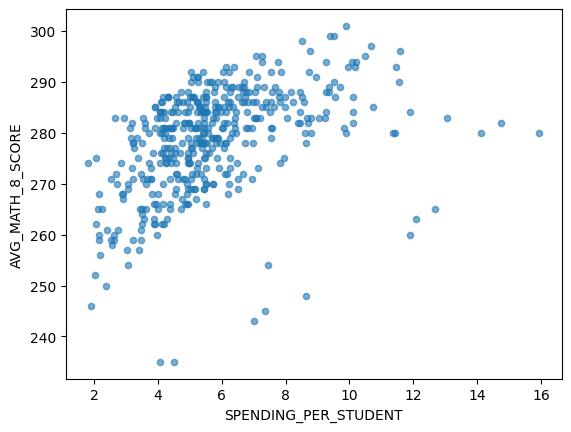

In [10]:
states_edu.plot.scatter(x="SPENDING_PER_STUDENT", y = "AVG_MATH_8_SCORE", alpha = 0.6)

**Based on the plot, there seems to be a positive correlation between spending per student and average math score in the 8th grade some potential outliers**

**Visualization 2**

<Axes: xlabel='HS_TO_PRIMARY_RATIO', ylabel='AVG_MATH_8_SCORE'>

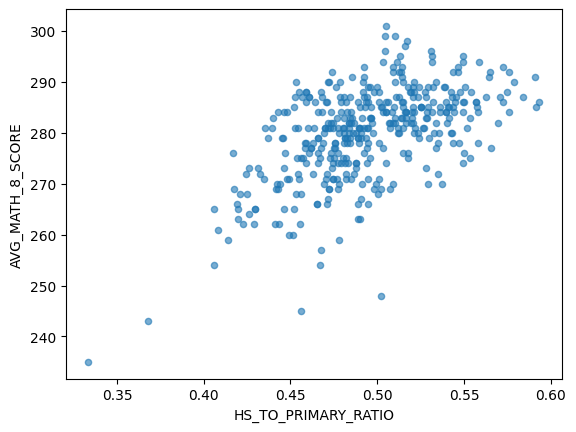

In [11]:
states_edu.plot.scatter(x = "HS_TO_PRIMARY_RATIO", y = "AVG_MATH_8_SCORE", alpha = 0.6)

**Based on the plot, there seems to be a positive correlation between the ratio of HS to primary school students and the average math 8 score**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = states_edu[["SPENDING_PER_STUDENT", "HS_TO_PRIMARY_RATIO", "PERCENT_EXPENDITURE_SPENT_ON_INSTRUCTION", "AVG_MATH_8_SCORE"]].dropna()
X = X.drop("AVG_MATH_8_SCORE", axis = 1)
y = states_edu.loc[X.index]["AVG_MATH_8_SCORE"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [15]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [16]:
# create your model here
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [19]:
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))

0.4163181622458926
-0.4499978766512674
5.338168742095265


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

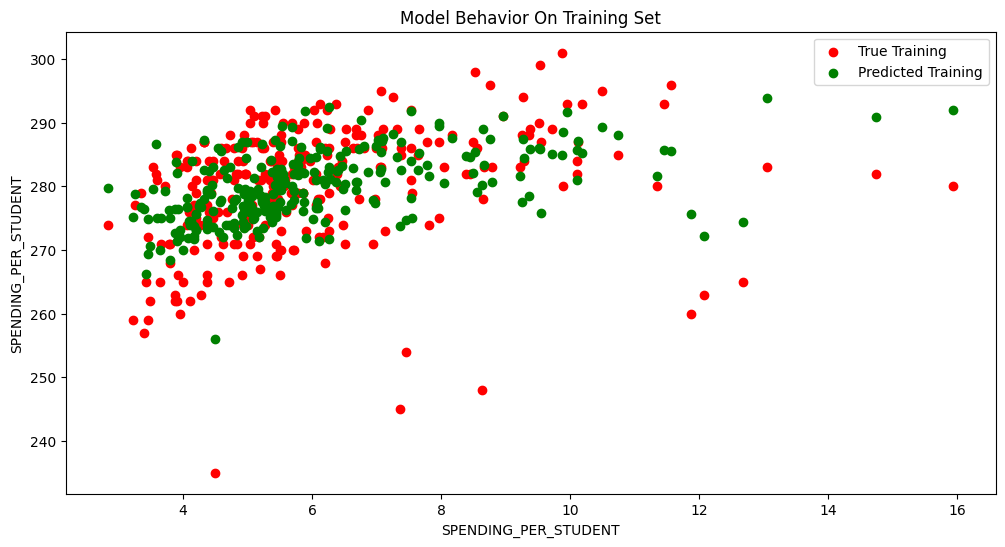

In [20]:
col_name = 'SPENDING_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('SPENDING_PER_STUDENT')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

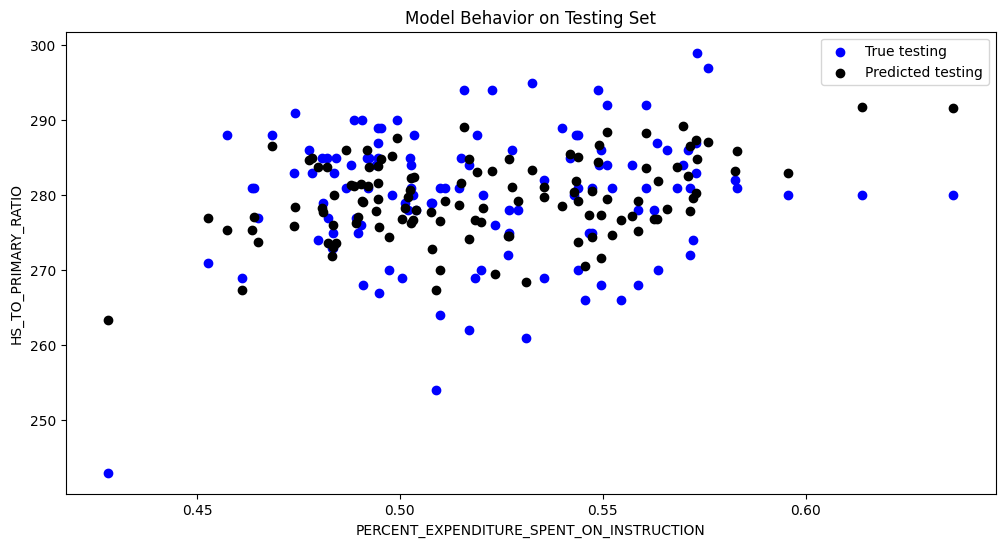

In [23]:
col_name = "HS_TO_PRIMARY_RATIO"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('HS_TO_PRIMARY_RATIO')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL>
The linear regression model based on the inputs of HS:primary school enrollment ratio, spending per student, and percent expenditure spent on instruction has a score of .41, which is not very good. This makes sense because in the initial graphs between the math 8 scores and the inputs, the variation was pretty high and the relationships did not seem to be entirely linear. The predicted testing and training points generally fall in the middle of the true testing and training points, which is a sign that training was successful, but the data just did not have that strong of a relationship. In conclusion, other predictors could probably yield a better result with the given dataset.
>**